# Stratified GridSearchCV

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_predict, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import warnings

Rozważmy zbiór Breast Cancer

In [5]:
np.random.seed(1)
cancer = datasets.load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [6]:
# get the data
X = cancer.data
y = cancer.target

Podzielmy zbiór na część testową i treningową .

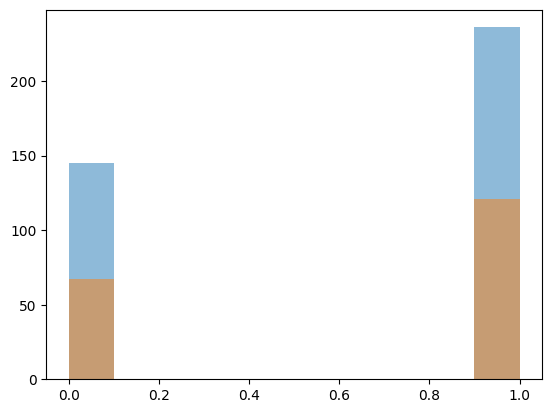

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Skalowanie danych w celu zmniejszenia czasu trenowania
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

plt.hist(y_train, alpha=0.5)
plt.hist(y_test, alpha=0.5)
plt.show()

# Zadanie
Znajdż najleprzy model dzieląc na zbiór testowy i terningowy dla 

* SVM z jądrem rbf
* SVM z jądrem poly
* SVM liniowego
* Regresji logistycznej


In [9]:
seed = 123
kfold = StratifiedKFold(n_splits=5, random_state=seed, shuffle=True)

In [10]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_1 = GridSearchCV(SVC(), param_grid, cv=kfold, return_train_score=True)

grid_1.fit(X_train, y_train)
grid_1.best_params_

{'C': 1, 'gamma': 0.001}

In [47]:
def heatmap(values, xlabel, ylabel, xticklabels, yticklabels, cmap=None,
            vmin=None, vmax=None, ax=None, fmt="%0.2f"):
    if ax is None:
        ax = plt.gca()
    # plot the mean cross-validation scores
    img = ax.pcolor(values, cmap=cmap, vmin=vmin, vmax=vmax)
    img.update_scalarmappable()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(np.arange(len(xticklabels)) + .5)
    ax.set_yticks(np.arange(len(yticklabels)) + .5)
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    ax.set_aspect(1)

    for p, color, value in zip(img.get_paths(), img.get_facecolors(),
                               img.get_array().flatten()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.mean(color[:3]) > 0.5:
            c = 'k'
        else:
            c = 'w'
        ax.text(x, y, fmt % value, color=c, ha="center", va="center")
    return img

In [19]:
# convert to DataFrame
results = pd.DataFrame(grid_1.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.020637,0.006633,0.019863,0.016922,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.623377,0.618421,0.618421,...,0.619412,0.001982,4,0.618421,0.619672,0.619672,0.619672,0.619672,0.619422,0.0005
1,0.049562,0.056383,0.014136,0.003432,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.623377,0.618421,0.618421,...,0.619412,0.001982,4,0.618421,0.619672,0.619672,0.619672,0.619672,0.619422,0.0005
2,0.028638,0.017597,0.011626,0.005484,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.623377,0.618421,0.618421,...,0.619412,0.001982,4,0.618421,0.619672,0.619672,0.619672,0.619672,0.619422,0.0005
3,0.019099,0.003260,0.013364,0.004310,0.001,1,"{'C': 0.001, 'gamma': 1}",0.623377,0.618421,0.618421,...,0.619412,0.001982,4,0.618421,0.619672,0.619672,0.619672,0.619672,0.619422,0.0005
4,0.019649,0.003281,0.013261,0.002040,0.001,10,"{'C': 0.001, 'gamma': 10}",0.623377,0.618421,0.618421,...,0.619412,0.001982,4,0.618421,0.619672,0.619672,0.619672,0.619672,0.619422,0.0005


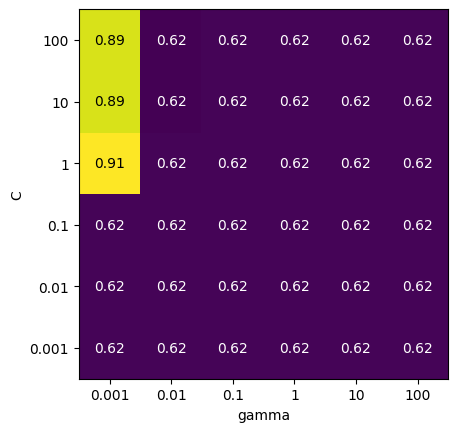

In [20]:
scores = np.array(results.mean_test_score).reshape(6, 6)
# plot the mean cross-validation scores
heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'], ylabel='C', yticklabels=param_grid['C'],
        cmap="viridis")
plt.show()

In [74]:
def grid_fit(model, param_grid):
    grid = GridSearchCV(model, param_grid, cv=kfold, return_train_score=True)
    grid.fit(X_train_scaled, y_train)

    results = pd.DataFrame(grid.cv_results_)
    scores = np.array(results.mean_test_score).reshape(len(param_grid['C']), len(param_grid.get('gamma', [1])))

    return scores, grid.best_estimator_

In [28]:
def score_model(model):
    y_pred = model.predict(X_test_scaled)

    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    accuracy = metrics.accuracy_score(y_test, y_pred)

    return precision, recall, f1, accuracy

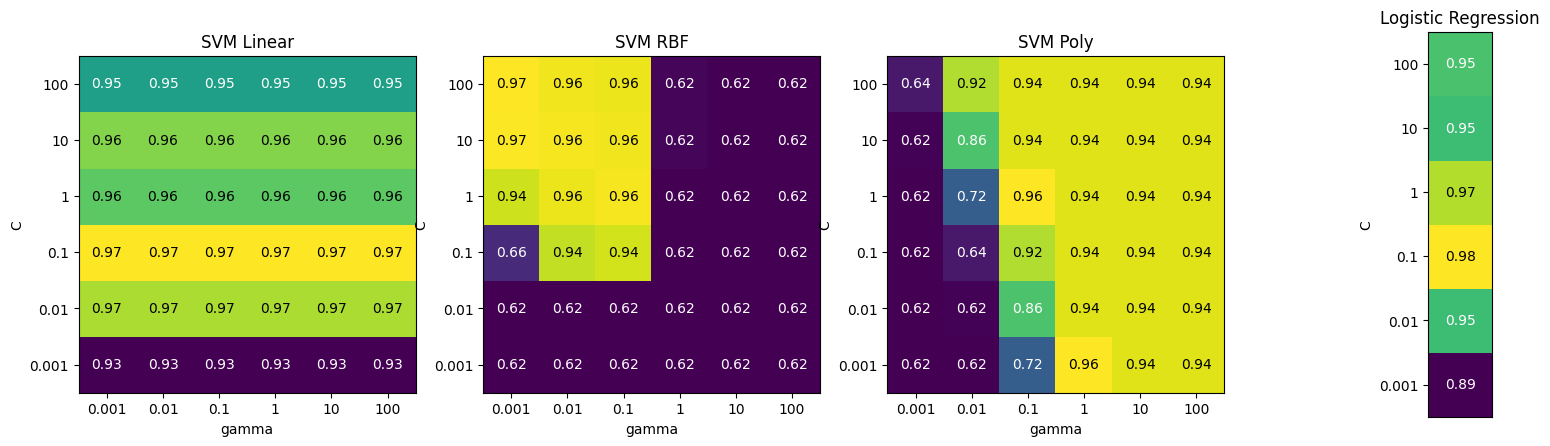

In [76]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
df = pd.DataFrame(columns=["name", "precision", "recall", "f1", "accuracy"])

param_grid_svm = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                  'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

methods = [
    ("SVM Linear", SVC(kernel="linear"), param_grid_svm),
    ("SVM RBF", SVC(kernel="rbf"), param_grid_svm),
    ("SVM Poly", SVC(kernel="poly"), param_grid_svm),
    ("Logistic Regression", LogisticRegression(), param_grid_lr)
]

for i, (method, model, param_grid) in enumerate(methods):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        scores, best_model = grid_fit(model, param_grid)
        precision, recall, f1, accuracy = score_model(best_model)
        df.loc[i] = [method, *score_model(best_model)]

    heatmap(
        scores,
        xlabel='gamma' if 'gamma' in param_grid.keys() else "",
        xticklabels=param_grid.get('gamma', []),
        ylabel="C",
        yticklabels=param_grid.get('C', None),
        cmap="viridis",
        ax=axs[i],
    )
    axs[i].set_title(f"{method}")

plt.show()

In [77]:
df.head()

,name,precision,recall,f1,accuracy
0,SVM Linear,0.983471,0.983471,0.983471,0.978723
1,SVM RBF,0.983471,0.983471,0.983471,0.978723
2,SVM Poly,0.959677,0.983471,0.971429,0.962766
3,Logistic Regression,0.983607,0.991736,0.987654,0.984043
